<a href="https://colab.research.google.com/github/chiragtyagi2003/Sentiment_Classifier/blob/main/binary_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libaries
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import re
import shutil
import string

from tensorflow.keras import layers
from tensorflow.keras import losses

In [2]:
# downloading the dataset

url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

dataset = tf.keras.utils.get_file('aclImdb_v1', url, untar=True, cache_dir = '', cache_subdir = '')

dataset_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')

84125825/84125825 [==============================] - 6s 0us/step


In [3]:
print(dataset_dir)

/tmp/.keras/aclImdb


In [4]:
os.listdir(dataset_dir)

['imdbEr.txt', 'README', 'test', 'imdb.vocab', 'train']

In [5]:
train_dir = os.path.join(dataset_dir, 'train')
print(train_dir)

/tmp/.keras/aclImdb/train


In [6]:
os.listdir(train_dir)

['neg',
 'unsupBow.feat',
 'urls_unsup.txt',
 'urls_pos.txt',
 'unsup',
 'labeledBow.feat',
 'pos',
 'urls_neg.txt']

In [8]:
# going into pos dir
os.chdir(os.path.join(train_dir, 'pos'))

In [9]:

# getting current dir
os.getcwd()

'/tmp/.keras/aclImdb/train/pos'

In [10]:
os.listdir()

['1531_8.txt',
 '810_10.txt',
 '7198_9.txt',
 '2558_10.txt',
 '3144_10.txt',
 '887_10.txt',
 '9286_9.txt',
 '4957_8.txt',
 '11307_10.txt',
 '4078_10.txt',
 '9878_7.txt',
 '1362_10.txt',
 '10127_8.txt',
 '11435_10.txt',
 '6829_8.txt',
 '11825_8.txt',
 '3334_9.txt',
 '8284_8.txt',
 '9189_10.txt',
 '12497_10.txt',
 '11417_7.txt',
 '1162_9.txt',
 '5828_9.txt',
 '7141_8.txt',
 '4073_10.txt',
 '4419_7.txt',
 '653_10.txt',
 '8478_8.txt',
 '193_7.txt',
 '5415_10.txt',
 '5588_10.txt',
 '1159_10.txt',
 '4232_7.txt',
 '6067_10.txt',
 '10325_10.txt',
 '4414_9.txt',
 '8651_9.txt',
 '1787_10.txt',
 '646_9.txt',
 '11161_8.txt',
 '9335_10.txt',
 '11897_9.txt',
 '6040_10.txt',
 '3898_10.txt',
 '3831_10.txt',
 '7174_9.txt',
 '5721_10.txt',
 '7079_9.txt',
 '1512_10.txt',
 '7531_8.txt',
 '7471_10.txt',
 '3079_10.txt',
 '3916_8.txt',
 '4630_9.txt',
 '4599_10.txt',
 '7362_10.txt',
 '8295_7.txt',
 '8753_8.txt',
 '6380_9.txt',
 '3218_9.txt',
 '4393_7.txt',
 '2464_10.txt',
 '1595_7.txt',
 '168_9.txt',
 '5777_8

In [11]:
os.chdir(train_dir)

In [12]:
os.getcwd()

'/tmp/.keras/aclImdb/train'

In [13]:
os.listdir()

['neg',
 'unsupBow.feat',
 'urls_unsup.txt',
 'urls_pos.txt',
 'unsup',
 'labeledBow.feat',
 'pos',
 'urls_neg.txt']

In [14]:
# taking a sample file from pos
sample_file = os.path.join(train_dir, 'pos/1181_9.txt')
with open(sample_file) as f:
  print(f.read())

Rachel Griffiths writes and directs this award winning short film. A heartwarming story about coping with grief and cherishing the memory of those we've loved and lost. Although, only 15 minutes long, Griffiths manages to capture so much emotion and truth onto film in the short space of time. Bud Tingwell gives a touching performance as Will, a widower struggling to cope with his wife's death. Will is confronted by the harsh reality of loneliness and helplessness as he proceeds to take care of Ruth's pet cow, Tulip. The film displays the grief and responsibility one feels for those they have loved and lost. Good cinematography, great direction, and superbly acted. It will bring tears to all those who have lost a loved one, and survived.


In [15]:
#data preprocessing

# removing a dir
remove_dir = os.path.join(train_dir, 'unsup')
shutil.rmtree(remove_dir)

In [16]:
os.getcwd()

'/tmp/.keras/aclImdb/train'

In [17]:
os.listdir()

['neg',
 'unsupBow.feat',
 'urls_unsup.txt',
 'urls_pos.txt',
 'labeledBow.feat',
 'pos',
 'urls_neg.txt']

In [23]:
# preparing the dataset

batch_size = 32
seed = 42

# making the training set
raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    '/tmp/.keras/aclImdb/train',
    batch_size = batch_size,
    validation_split = 0.2,
    subset = 'training',
    seed = seed
)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.


In [34]:
# take specifies which batch number to take
for text_batch, label_batch in raw_train_ds.take(1):
  for i in range(32):
    print('Review', text_batch.numpy()[i])
    print('Label', label_batch.numpy()[i])

Review b"I went to see Fever Pitch with my Mom, and I can say that we both loved it. It wasn't the typical romantic comedy where someone is pining for the other, and blah blah blah... You weren't waiting for the climatic first kiss or for them to finally get together. It was more real, because you saw them through the relationship, rather than the whole movie be about them getting together. People could actually relate to the film, because it didn't seem like extraordinary circumstances, or impossible situations. It was really funny, and I think it was Jimmy Fallon's best performance. All in all... I would definitely recommend it!"
Label 1
Review b"from the view of a NASCAR Maniac like I am, the movie is interesting. You can see many race cars from 1983. Even tough, the racing scenes are not that much realistic. But I have to admit, that I haven't seen any race before 1995, because before that time, they didn't show any NASCAR races in Germany)<br /><br />from the view of a Burt Reynol

In [25]:
print(raw_train_ds)

<_BatchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [26]:
# checking the class names
print("0 => ", raw_train_ds.class_names[0])
print("1 => ", raw_train_ds.class_names[1])

0 =>  neg
1 =>  pos


In [27]:
# making the validation set

raw_val_ds = tf.keras.utils.text_dataset_from_directory(
    '/tmp/.keras/aclImdb/train',
    batch_size = batch_size,
    validation_split=0.2,
    subset = 'validation',
    seed = seed
)

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [28]:
# making the test st
raw_test_ds = tf.keras.utils.text_dataset_from_directory(
    '/tmp/.keras/aclImdb/test',
    batch_size = batch_size
)

Found 25000 files belonging to 2 classes.


In [44]:
# prepare the dataset for training

# standardization => to remove punctuation
# tokenizatio => splitting strings into tokens(single words)
# vectorization => converting tokens to numbers


# by defualt textVectorization doesn't remove HTML tags
# so we will have to customize it
def custom_standardization(input_data):

  # convert everything to lower case
  lowercase = tf.strings.lower(input_data)

  # stripping html
  # in lowercase data replace <br/> with ' '
  stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')

  # remove the whitespace and return the string
  return tf.strings.regex_replace(stripped_html, '[%s]' % re.escape(string.punctuation), '')

In [45]:
# making a vectorize layer

# the number of words going to be in the vocab
max_features = 10000

sequence_length = 250

vectorize_layer = layers.TextVectorization(
    standardize = custom_standardization,
    max_tokens = max_features,

    # output mode is set to int to create unique integer indices for each token
    output_mode = 'int',

    #output seq length, this will cause the layer to pad or truncate seqs to exatclty this value
    output_sequence_length = sequence_length
)

In [46]:
# make a text only dataset(without labels), then call adapt

# take only the text from train ds
train_text = raw_train_ds.map(lambda x, y:x)

vectorize_layer.adapt(train_text)

In [47]:
# function to vectorize the text
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label

In [48]:
text_batch, label_batch = next(iter(raw_train_ds))
first_review, first_label = text_batch[0], label_batch[0]
print("Review: ", first_review)
print("Label: ", raw_train_ds.class_names[first_label])
print("Vectorized Review: ", vectorize_text(first_review, first_label))

Review:  tf.Tensor(b"My children watch the show everyday that its on. Its a great program for younger children. However they need to stop showing re-runs and do some more actual shows and get rid of Rooney's and Deedee's YELLOW TEETH. Moe is the only Doodle bop with clean white pearlie teeth and the children notice these things and ask if the 2 don't ever brush their teeth? Does the show ever make its way to the United States and if so where can we find its schedule at. And one other thing if we might be able to add. Moe you need to stop hiding so much. Sometimes when you pop up out of no where you scare the younger children and whats with the pulling of the rope? What does that signify? other then getting wet all the time. They need to add newer things to their show instead of the same ole same ole. Kids loose interest that way.", shape=(), dtype=string)
Label:  neg
Vectorized Review:  (<tf.Tensor: shape=(1, 250), dtype=int64, numpy=
array([[  54,  457,  103,    2,  119, 2813,   12,  

In [55]:
print('444 ===> ', vectorize_layer.get_vocabulary()[444])

print('vocabulory size: {}'.format(len(vectorize_layer.get_vocabulary())))

444 ===>  mother
vocabulory size: 10000


In [57]:
# apply the vectorize layer to all three ds

train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

In [58]:
# configure dataset for performance
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [59]:
# building the neural network

embedding_dim = 16

model = tf.keras.Sequential([
    layers.Embedding(max_features + 1, embedding_dim),
    layers.Dropout(0.2),
    layers.GlobalAveragePooling1D(),
    layers.Dropout(0.2),
    layers.Dense(1)
    ])

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160016    
                                                                 
 dropout (Dropout)           (None, None, 16)          0         
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
__________________________________________________

In [61]:
# compile
model.compile(loss = losses.BinaryCrossentropy(from_logits = True),
              optimizer = 'adam',
              metrics = tf.metrics.BinaryAccuracy(threshold=0.0)
              )

In [62]:
# train the model
epochs = 10
history = model.fit(train_ds, validation_data = val_ds, epochs = epochs)

Epoch 1/10
625/625 [==============================] - 8s 12ms/step - loss: 0.6622 - binary_accuracy: 0.6960 - val_loss: 0.6115 - val_binary_accuracy: 0.7744
Epoch 2/10
625/625 [==============================] - 4s 6ms/step - loss: 0.5456 - binary_accuracy: 0.8008 - val_loss: 0.4956 - val_binary_accuracy: 0.8226
Epoch 3/10
625/625 [==============================] - 4s 7ms/step - loss: 0.4431 - binary_accuracy: 0.8460 - val_loss: 0.4186 - val_binary_accuracy: 0.8482
Epoch 4/10
625/625 [==============================] - 4s 6ms/step - loss: 0.3770 - binary_accuracy: 0.8670 - val_loss: 0.3728 - val_binary_accuracy: 0.8600
Epoch 5/10
625/625 [==============================] - 4s 7ms/step - loss: 0.3351 - binary_accuracy: 0.8785 - val_loss: 0.3441 - val_binary_accuracy: 0.8672
Epoch 6/10
625/625 [==============================] - 4s 6ms/step - loss: 0.3052 - binary_accuracy: 0.8880 - val_loss: 0.3257 - val_binary_accuracy: 0.8718
Epoch 7/10
625/625 [==============================] - 4s 6ms/st

In [63]:
# evaluating the model

loss, accuracy = model.evaluate(test_ds)

print('Loss: ', loss)
print('Accuracy: ',  accuracy)

782/782 [==============================] - 3s 4ms/step - loss: 0.3102 - binary_accuracy: 0.8737
Loss:  0.31021589040756226
Accuracy:  0.8737199902534485


In [64]:
# create a plot

history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

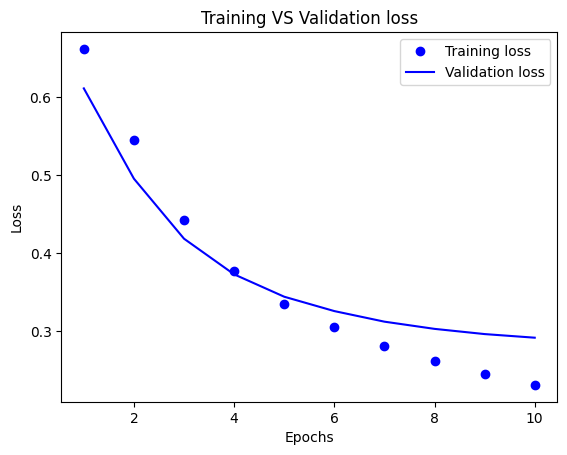

In [68]:
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)


# plot loss
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training VS Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

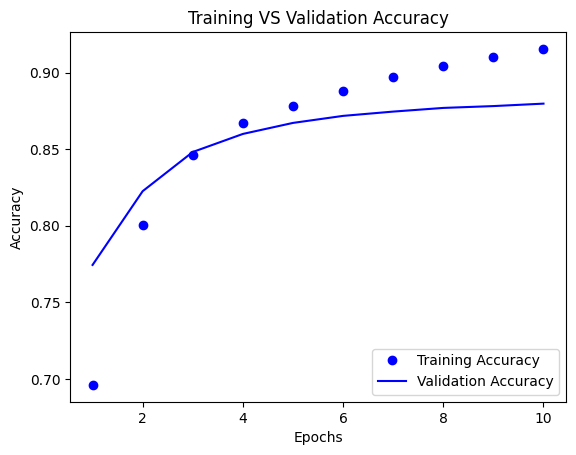

In [69]:
# plot accuracy

plt.plot(epochs, acc, 'bo', label = "Training Accuracy")
plt.plot(epochs, val_acc, 'b', label = "Validation Accuracy")
plt.title('Training VS Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()